# Indexation d'images par la couleur

## 1.

In [1]:
import matplotlib.pyplot as plt

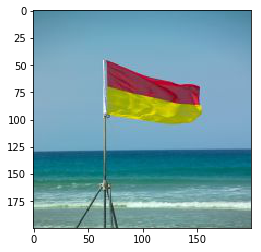

In [5]:
img = plt.imread('C:/Users/Documents/M1_cours/M1_extraction_de_donnees/Images/45.jpg');
plt.imshow(img)

In [6]:
img.shape

(200, 200, 3)

En regardant la taille de l'image on remarque qu'elle est constituée de 3 "couches" qui correspondent aux RVB, on décide donc de décomposer l'image:

In [7]:
imgR = img[:,:,0]
imgV = img[:,:,1]
imgB = img[:,:,2]

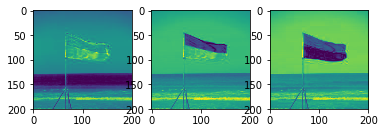

In [8]:
fig,axes = plt.subplots(1,3)
axes[0].imshow(imgR)
axes[1].imshow(imgV)
axes[2].imshow(imgB)

## 2. Impact de la quantification

In [9]:
import numpy as np

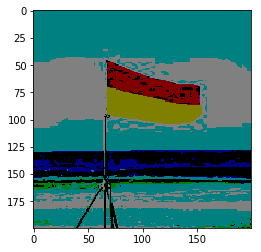

In [10]:
plt.imshow(np.bitwise_and(img,128))

Si on récupère seuleument le premier bit de poids fort sur chaque composante, on peut remarquer que l'image est beaucoup moins nuancée et que les pixels sont plus visibles.

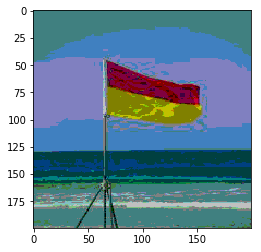

In [11]:
# Voici ce que cela donne avec les deux premiers bits de poids forts:
img2 = np.bitwise_and(img,128) + np.bitwise_and(img,64)
plt.imshow(img2)

### Pour la RMSE :

In [1]:
def rmse(i1,i2):
    return np.sqrt(np.mean((i1.astype(float)-i2.astype(float))**2))

L'erreur quadratique moyenne entre l'image de départ et l'image quatifiée :

In [13]:
rmse(img,img2)

36.29945993629474

## 3) Quantification de la couleur

Pour commencer, il faut utiliser les images des trois composantes récupérées précédemment : imgR,imdV et imgB.
Pour chacune des composantes, on récupère leurs 2 premiers bits de poids fort qu'on divise respectivement par 128 et 64 pour les mettre en binaire :

In [14]:
# Rouge:
imgBit7R = np.bitwise_and(imgR,128)/128
imgBit6R = np.bitwise_and(imgR,64)/64

# Vert:
imgBit7V = np.bitwise_and(imgV,128)/128
imgBit6V = np.bitwise_and(imgV,64)/64

# Bleu:
imgBit7B = np.bitwise_and(imgB,128)/128
imgBit6B = np.bitwise_and(imgB,64)/64

On additionne les bits de poids fort pour avoir chaque composante sur 2 bits:

In [15]:
# Rouge:
img1R = imgBit7R + imgBit6R

# Vert:
img1V = imgBit7V + imgBit6V

# Bleu:
img1B = imgBit7B + imgBit6B

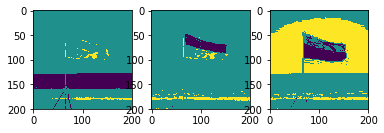

In [16]:
fig,axes = plt.subplots(1,3)
axes[0].imshow(img1R)
axes[1].imshow(img1V)
axes[2].imshow(img1B)

On combine ces trois composantes pour obtenir une image en 8 bits, sachant que le rouge sera le plus a gauche on le multipliera par 2^4, le vert sera en position du milieu donc multiplié par 2^2 et le bleu sera a droite donc multiplié par 2^0 :

In [17]:
imgq = img1R*(2**4)+img1V*(2**2)+img1B*(2**0)

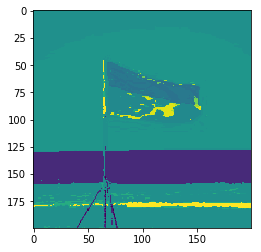

In [18]:
plt.imshow(imgq)

On créé la fonction correspondant à ce qui a été fait précedemment:

In [19]:
def quantification(img,bits):
    r=img[:,:,0]
    v=img[:,:,1]
    b=img[:,:,2]
    if bits==2:
        imr=np.bitwise_and(r,128)/64 + np.bitwise_and(r,64)/64
        imv=np.bitwise_and(v,128)/64 + np.bitwise_and(v,64)/64
        imb=np.bitwise_and(b,128)/64 + np.bitwise_and(b,64)/64
        return (imr*(2**4)+imv*(2**2)+imb*(2**0))
    if bits==3:
        imr=np.bitwise_and(r,128)/32 + np.bitwise_and(r,64)/32 + np.bitwise_and(r,32)/32
        imv=np.bitwise_and(v,128)/32 + np.bitwise_and(v,64)/32 + np.bitwise_and(r,32)/32
        imb=np.bitwise_and(b,128)/32 + np.bitwise_and(b,64)/32 + np.bitwise_and(r,32)/32
        return (imr*(2**6)+imv*(2**3)+imb*(2**0))

In [20]:
# cette fonction retourne donc une image sur 64 bits SI bits = 2
quantification(img,2)

array([[26., 26., 26., ..., 26., 26., 26.],
       [26., 26., 26., ..., 26., 26., 26.],
       [26., 26., 26., ..., 26., 26., 26.],
       ...,
       [26., 26., 26., ..., 26., 26., 25.],
       [42., 42., 42., ..., 25., 25., 25.],
       [42., 42., 42., ..., 21., 21., 25.]])

In [21]:
# elle retourne une image sur 512 bits SI bits = 3
quantification(img,3)

array([[164., 164., 164., ..., 164., 164., 164.],
       [164., 164., 164., ..., 164., 164., 164.],
       [164., 164., 164., ..., 164., 164., 164.],
       ...,
       [237., 237., 237., ..., 237., 237., 235.],
       [292., 292., 292., ..., 235., 235., 235.],
       [292., 292., 292., ..., 219., 219., 235.]])

## 4) Histogramme de couleur

Pour la fonction histogramme:
Pour chaque valeur différente (ici de 0 à 64 ou de 0 à 512),on regarde combien de fois elles sont apparues.

In [22]:
def histogramme(img,bits):
    if bits == 2:
        nb = 64
    if bits == 3:
        nb = 512
    hist = [int(0) for i in range(nb)]
    img1 = quantification(img,bits)
    for i in img1:
        for j in i:
            hist[int(j)] = hist[int(j)] + 1
    return hist

In [23]:
hist1 = histogramme(img,2)
hist2 = histogramme(img,3)

###  Pour 2 bits

<BarContainer object of 64 artists>

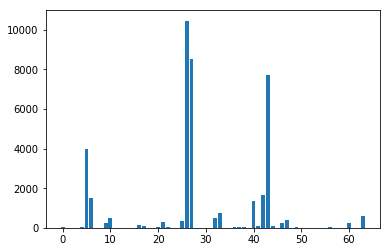

In [24]:
plt.bar(range(len(hist1)),hist1)

### Pour 3 bits

<BarContainer object of 512 artists>

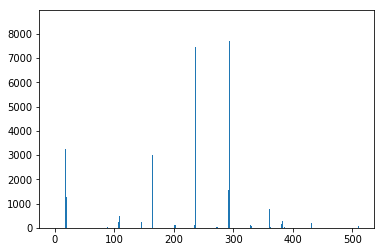

In [25]:
plt.bar(range(len(hist2)),hist2)

## 5) Indexation d'image

Pour chaque image du repertoire on calcule son histogramme grâce à la fonction précédente et on stocke ces histogrammes dans une liste :

In [26]:
def indexation(rep,bits):
    ind = []
    for img in rep:
        ind.append(histogramme(img,bits))
    return ind

On récupère toutes les images du répertoire :

In [40]:
def repertoir(listnb):
    repim = []
    for h in listnb:
        if h < 10:
            repim.append(plt.imread('C:/Users/Documents/M1_cours/M1_extraction_de_donnees/Images/0'+str(h)+'.jpg'))
        elif h < 100:
            repim.append(plt.imread('C:/Users/Documents/M1_cours/M1_extraction_de_donnees/Images/'+str(h)+'.jpg'))
    return repim

In [41]:
# Pour vérifier que toutes les images soit là:
len(repertoir(range(1,51)))

50

In [43]:
np.shape(indexation(repertoir(range(1,51)),2))

(50, 64)

In [44]:
np.shape(indexation(repertoir(range(1,51)),3))

(50, 512)

## 6) Recherche d'images similaires par la couleur

Pour calculer la "distance" entre images, on se sert de la formule d'intersection d'histogramme vue en cours.

Pour chaque "bar" de chaque histogramme on retient la plus petite valeur entre les deux bars des deux histogrammes puis on additionne toutes ces valeurs. Plus la valeur obtenue est grande plus les images sont similaires (au niveaux des couleurs).

On crée donc une fonction qui va calculer cette distance entre 2 images :

In [61]:
def intersectionHist(hist1,hist2):
    dist = 0
    for i in range(len(hist1)):
        dist = dist + min(hist1[i],hist2[i])
    return dist

Pour rechercher les 5 images les plus similaires à l'image fournie dans la fonction, on va procéder comme suit : 
- Pour chaque image du repertoire, on calcule la distance de son histogramme avec celui de l'image que l'on veut
- On retient la valeur de cette distance et le numero de l'image si celle-ci fait partie du top 5

In [91]:
def maxL(L,nb):
    for i in range(len(L)):
        if nb > L[i]:
            L.insert(i,nb)
            L.pop()
            return (L,i)
    return (L,-1)

In [92]:
# test de maxL
Lt=[0,0,0,0,0]
Lk=[2,750,3,57,93,6,45]
for i in Lk:
    Lt,j = maxL(Lt,i)
    print(Lt,j)
# (750,93,57,45,6)

[2, 0, 0, 0, 0] 0
[750, 2, 0, 0, 0] 0
[750, 3, 2, 0, 0] 1
[750, 57, 3, 2, 0] 1
[750, 93, 57, 3, 2] 1
[750, 93, 57, 6, 3] 3
[750, 93, 57, 45, 6] 3


In [2]:
def recherche(bits):
    numimg = int(input('Veuillez rentrer le numéro de l image que vous souhaitez comparer : '))
    listnumimg = [0 for i in range(5)]
    listintersec = [0 for i in range(5)]
    rep = repertoir(range(1,51))
    listeHist = indexation(rep,bits)
    imghist = listeHist[numimg-1]
    for n in range(1,51):
        if n != numimg:
            h = intersectionHist(imghist,listeHist[n-1])
            listintersec,i = maxL(listintersec,h)
            if i != -1:
                listnumimg.insert(i,n)
                listnumimg.pop()
    return numimg,listintersec,listnumimg

In [85]:
numimg,listeinter,listenum = recherche(2)
print(numimg,listenum,listeinter)

veuillez rentrer le numéro de l image que vous souhaitez comparer: 45
45 [13, 47, 44, 46, 22] [19508, 15749, 14919, 14912, 13403]


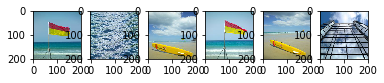

In [86]:
L = repertoir([numimg]+listenum)

fig,axes = plt.subplots(1,6)
axes[0].imshow(L[0])
axes[1].imshow(L[1])
axes[2].imshow(L[2])
axes[3].imshow(L[3])
axes[4].imshow(L[4])
axes[5].imshow(L[5])

## 7) Variante

In [87]:
numimg,listeinter,listenum = recherche(3)
print(listenum,listeinter)

veuillez rentrer le numéro de l image que vous souhaitez comparer: 45
[13, 44, 47, 46, 26] [15066, 14212, 13943, 13643, 10204]


On voit que les résultats sont meilleurs car l'image 44 est passée devant l'image 47 ce qui est plus logique sachant que l'image 44 a été prise au même endroit que l'image 45.

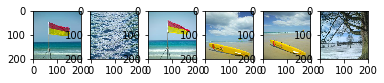

In [88]:
L = repertoir([numimg]+listenum)

fig,axes = plt.subplots(1,6)
axes[0].imshow(L[0])
axes[1].imshow(L[1])
axes[2].imshow(L[2])
axes[3].imshow(L[3])
axes[4].imshow(L[4])
axes[5].imshow(L[5])